In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("classic")
sns.set(rc={"figure.figsize":(12,6)})

In [2]:
# I imported the file to start working with it

In [3]:
attacks = pd.read_csv("/Users/victorramos/documents/ironhack/Proyectos Ironhack/MyProject/data/attacks.csv", encoding='latin1')
attacks

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#I get the info about the columns in this file to start have a better pictures of what I going to work with
attacks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             8702 non-null   object 
 1   Date                    6302 non-null   object 
 2   Year                    6300 non-null   float64
 3   Type                    6298 non-null   object 
 4   Country                 6252 non-null   object 
 5   Area                    5847 non-null   object 
 6   Location                5762 non-null   object 
 7   Activity                5758 non-null   object 
 8   Name                    6092 non-null   object 
 9   Sex                     5737 non-null   object 
 10  Age                     3471 non-null   object 
 11  Injury                  6274 non-null   object 
 12  Fatal (Y/N)             5763 non-null   object 
 13  Time                    2948 non-null   object 
 14  Species                 3464 non-null 

In [5]:
#I used head with the same intentions of the last code, but looking at what the columns contains.
attacks.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


In [6]:
attacks.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

In [7]:
# I used drop in the next to lines to delete columns with only NaN's cells or that contain data that I considere irrelevant.

attacks.drop(columns=["Unnamed: 22", "Case Number.1", "Case Number.2", "original order", "href formula", "pdf", "Investigator or Source", "Unnamed: 23"], inplace=True)

In [8]:
# I used 
attacks.drop(columns=['href'], inplace=True)

In [9]:
attacks

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# Heres in the next 4 code lines, I tried to find all the regardins NaN's in the file and delete them.

In [11]:
no_nan_rows = attacks[attacks.notna().all(axis=1)]

In [12]:
missing_values = attacks.isnull()

In [13]:
missing_values.any()
missing_values.sum()

Case Number    17021
Date           19421
Year           19423
Type           19425
Country        19471
Area           19876
Location       19961
Activity       19965
Name           19631
Sex            19986
Age            22252
Injury         19449
Fatal (Y/N)    19960
Time           22775
Species        22259
dtype: int64

In [14]:
attacks.dropna(inplace=True)

In [15]:
attacks.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark
6,2018.06.03.a,03-Jun-2018,2018.0,Unprovoked,BRAZIL,Pernambuco,"Piedade Beach, Recife",Swimming,Jose Ernesto da Silva,M,18,FATAL,Y,Late afternoon,Tiger shark
8,2018.05.26.b,26-May-2018,2018.0,Unprovoked,USA,Florida,"Cocoa Beach, Brevard County",Walking,Cody High,M,15,Lower left leg bitten,N,17h00,"Bull shark, 6'"
10,2018.05.24,24-May-2018,2018.0,Provoked,AUSTRALIA,Queensland,Cairns Aquarium,Feeding sharks,male,M,32,Minor bite to hand by captive shark. PROVOKED ...,N,Morning,Grey reef shark
13,2018.05.13.a,13-May-2018,2018.0,Invalid,ENGLAND,Cornwall,Off Land's End,Fishing,Max Berryman,M,21,Injured by teeth of a dead porbeagle shark he ...,N,08h15,Invalid incident


In [16]:
top_species = attacks['Species '].value_counts().nlargest(30)
print(top_species)

White shark                        74
4' shark                           34
Tiger shark                        34
Bull shark                         31
4' to 5' shark                     19
1.8 m [6'] shark                   19
6' shark                           16
3' to 4' shark                     15
3' shark                           15
1.2 m [4'] shark                   14
5' shark                           13
1.5 m [5'] shark                   13
1.2 m to 1.5 m [4' to 5'] shark    12
6 m [20'] white shark              10
5 m [16.5'] white shark             9
3 m [10'] shark                     9
2 m shark                           8
Raggedtooth shark                   8
1.5 m shark                         8
4 m [13'] white shark               8
Unidentified species                7
White shark, 4 m [13']              6
"a small shark"                     6
Bull shark, 6'                      6
Blacktip shark                      6
2.4 m [8'] shark                    6
3 m shark   

In [17]:
import re
# I reate a regular expression pattern that matches white shark, tiger shark or bull shark
pattern = r"(white shark|tiger shark|bull shark)"

attacks["Species "] = attacks["Species "].str.lower()

# Extract the matched strings from the specified column and put them in a new column with "Species cleaned"
attacks['Species cleaned'] = attacks['Species '].str.extract(pattern, expand=True)



In [18]:
attacks.drop(columns='Species ', inplace=True)

In [19]:
top_countries = attacks['Country'].value_counts().nlargest(10)
print(top_countries)

USA                 675
AUSTRALIA           307
SOUTH AFRICA        216
BAHAMAS              25
NEW ZEALAND          20
BRAZIL               15
REUNION              15
PAPUA NEW GUINEA     12
MEXICO               11
NEW CALEDONIA        10
Name: Country, dtype: int64


In [20]:
attacks

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species cleaned
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,white shark
6,2018.06.03.a,03-Jun-2018,2018.0,Unprovoked,BRAZIL,Pernambuco,"Piedade Beach, Recife",Swimming,Jose Ernesto da Silva,M,18,FATAL,Y,Late afternoon,tiger shark
8,2018.05.26.b,26-May-2018,2018.0,Unprovoked,USA,Florida,"Cocoa Beach, Brevard County",Walking,Cody High,M,15,Lower left leg bitten,N,17h00,bull shark
10,2018.05.24,24-May-2018,2018.0,Provoked,AUSTRALIA,Queensland,Cairns Aquarium,Feeding sharks,male,M,32,Minor bite to hand by captive shark. PROVOKED ...,N,Morning,NaN
13,2018.05.13.a,13-May-2018,2018.0,Invalid,ENGLAND,Cornwall,Off Land's End,Fishing,Max Berryman,M,21,Injured by teeth of a dead porbeagle shark he ...,N,08h15,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5814,1880.11.25,25-Nov-1880,1880.0,Unprovoked,AUSTRALIA,Queensland,"Petrie Bight, Brisbane River",Swimming,Alexey Drury,M,12,"Feet bitten, surgically amputated FATAL",Y,Afternoon,bull shark
5922,1868.05.13,13-May-1868,1868.0,Unprovoked,INDIA,Hoogly River,Ghat,Standing,male,M,35,"FATAL, upper left thigh, groin & buttocks seve...",Y,Before 10h30,NaN
6242,ND.0064,1960s,0.0,Unprovoked,IRAQ,Basrah,Shatt-al-Arab River,Swimming naked near a date palm where many dat...,male,M,6,Arm severed,N,Afternoon,bull shark
6243,ND.0063,1960s,0.0,Unprovoked,IRAQ,Basrah,Shatt-al-Arab River near Abu al Khasib,Swimming in section of river used for washing ...,male,M,16,Right leg lacerated & surgically amputated,N,Afternoon,bull shark


In [21]:
top_species = attacks["Species cleaned"].value_counts().nlargest(10)
print(top_species)

white shark    370
tiger shark    151
bull shark     105
Name: Species cleaned, dtype: int64


In [22]:
# I filter the data to only include attacks that occurred in the USA, Australia, or South Africa. 
# Creating a Boolean mask based on the 'Country' column and using it to filter the Data

In [23]:
mask = attacks['Country'].isin(['USA', 'AUSTRALIA', 'SOUTH AFRICA'])
filtered_attacks = attacks[mask]
filtered_attacks

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species cleaned
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,white shark
8,2018.05.26.b,26-May-2018,2018.0,Unprovoked,USA,Florida,"Cocoa Beach, Brevard County",Walking,Cody High,M,15,Lower left leg bitten,N,17h00,bull shark
10,2018.05.24,24-May-2018,2018.0,Provoked,AUSTRALIA,Queensland,Cairns Aquarium,Feeding sharks,male,M,32,Minor bite to hand by captive shark. PROVOKED ...,N,Morning,NaN
21,2018.04.25.a,25-Apr-2018,2018.0,Unprovoked,AUSTRALIA,Western Australia,"Surfers Point, Prevelly",Surfing,Rob Bruce,M,60,"No injury, knocked off board by shark",N,09h30,NaN
24,2018.04.22,22-Apr-2018,2018.0,Unprovoked,SOUTH AFRICA,Western Cape Province,"Robberg Beach, Plettenberg Bay",Paddle-skiing,male,M,33,"No injury, shark bit hole in ski",N,09h40,white shark
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5498,1905.03.26,26-Mar-1905,1905.0,Unprovoked,AUSTRALIA,New South Wales,Lismore,Bathing,Richard Owen,M,40,Righ thigh severely bitten,N,Morning,NaN
5545,1901.07.30,30-Jul-1901,1901.0,Unprovoked,SOUTH AFRICA,Western Cape Province,Windmill Beach,Swimming,"John Hendrick Adrian Chandler, a prisoner of war",M,29,"Right leg bitten & foot severed, right arm bit...",Y,14h15,white shark
5648,1894.11.28,28-Nov-1894,1894.0,Unprovoked,AUSTRALIA,New South Wales,Newcastle,Bathing,Horace Hewison,M,19,"""Lost his arm""",N,Morning,NaN
5684,1892.03.02,02-Mar-1892,1892.0,Provoked,AUSTRALIA,New South Wales,Lake Macquarie,Fishing,Christopher Wang,M,21,Lacerations to calf by netted shark PROVOKED I...,N,Night,NaN


In [24]:
# I will group the filtered data by country and species. 

In [25]:
grouped_data = filtered_attacks.groupby(['Country', 'Species cleaned'])


In [26]:
# I can use the size() function to get the number of attacks for each group.

In [27]:
attack_counts = grouped_data.size().reset_index(name='Count')
attack_counts.sort_index

<bound method DataFrame.sort_index of         Country Species cleaned  Count
0     AUSTRALIA      bull shark     21
1     AUSTRALIA     tiger shark     27
2     AUSTRALIA     white shark     94
3  SOUTH AFRICA      bull shark      2
4  SOUTH AFRICA     tiger shark      6
5  SOUTH AFRICA     white shark    110
6           USA      bull shark     47
7           USA     tiger shark     76
8           USA     white shark    133>

In [28]:
#now we can use the pivot_table() function to reshape the data and make it easier to visualize.

In [29]:
pivot_table = attack_counts.pivot_table(values='Count', index='Country', columns='Species cleaned', fill_value=0)
pivot_table

Species cleaned,bull shark,tiger shark,white shark
Country,,,
AUSTRALIA,21,27,94
SOUTH AFRICA,2,6,110
USA,47,76,133


In [30]:
# We can filter only by fatal attacks.

In [31]:
fatal_attacks = filtered_attacks[filtered_attacks['Fatal (Y/N)'] == 'Y']
fatal_attacks

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species cleaned
155,2017.04.17.a,17-Apr-2017,2017.0,Unprovoked,AUSTRALIA,Western Australia,Kelpies near Wylie Bay,Surfing,Laeticia Brouwer,F,17,FATAL,Y,16h00,white shark
267,2016.06.05.a,05-Jun-2016,2016.0,Unprovoked,AUSTRALIA,Western Australia,Mindarie,Diving,Doreen Collyer,F,60,FATAL,Y,11h30,NaN
271,2016.05.31,31-May-2016,2016.0,Unprovoked,AUSTRALIA,Western Australia,"Falcon Beach, Mandurah",Surfing,Ben Gerring,M,29,FATAL,Y,16h00,white shark
385,2015.07.25,25-Jul-2015,2015.0,Unprovoked,AUSTRALIA,Tasmania,"Lachan Island, Mercury Passage",Scallop diving on hookah,Damien Johnson,M,46,FATAL,Y,10h00,white shark
448,2015.02.09,09-Feb-2015,2015.0,Unprovoked,AUSTRALIA,New South Wales,Shelly Beach,Surfing,Tadashi Nakahara,M,41,FATAL,Y,10h00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5311,1916.07.01,01-Jul-1916,1916.0,Unprovoked,USA,New Jersey,"Beach Haven, Ocean County",Swimming,Charles E. Vansant,M,24,"FATAL, left leg bitten",Y,17h00,white shark
5375,1912.01.26,26-Jan-1912,1912.0,Unprovoked,AUSTRALIA,New South Wales,"Fig Tree Bridge, Lane Cove River, near Sydney",Swimming,James Edward Morgan,M,21,FATAL,Y,15h00,NaN
5484,1906.01.20,20-Jan-1906,1906.0,Unprovoked,SOUTH AFRICA,KwaZulu-Natal,"Battery Beach, Durban",Washing horses,Ramdayal,M,30,"FATAL, hips & thigh bitten",Y,12h00,NaN
5545,1901.07.30,30-Jul-1901,1901.0,Unprovoked,SOUTH AFRICA,Western Cape Province,Windmill Beach,Swimming,"John Hendrick Adrian Chandler, a prisoner of war",M,29,"Right leg bitten & foot severed, right arm bit...",Y,14h15,white shark


In [32]:
# can group the fatal attacks by country and species and use the size() function to get the number of fatal attacks for each group

In [33]:
fatal_counts = fatal_attacks.groupby(['Country', 'Species cleaned']).size().reset_index(name='Count')
fatal_counts 
fatal_counts 

,Country,Species cleaned,Count
0,AUSTRALIA,bull shark,10
1,AUSTRALIA,tiger shark,10
2,AUSTRALIA,white shark,43
3,SOUTH AFRICA,bull shark,1
4,SOUTH AFRICA,tiger shark,4
5,SOUTH AFRICA,white shark,29
6,USA,bull shark,4
7,USA,tiger shark,7
8,USA,white shark,17


In [34]:
fatal_pivot_table = fatal_counts.pivot_table(values='Count', index='Country', columns='Species cleaned', fill_value=0)
fatal_pivot_table

Species cleaned,bull shark,tiger shark,white shark
Country,,,
AUSTRALIA,10,10,43
SOUTH AFRICA,1,4,29
USA,4,7,17


In [35]:
#With this code, you can see the number of fatal attacks for each species in each country,
# and we can use the pivot_table to compare the number of fatal attacks of the Bull shark 
# in the USA with the number of fatal attacks of the White and Tiger shark.

<module 'matplotlib.pyplot' from '/Users/victorramos/opt/anaconda3/envs/ironhack/lib/python3.9/site-packages/matplotlib/pyplot.py'>

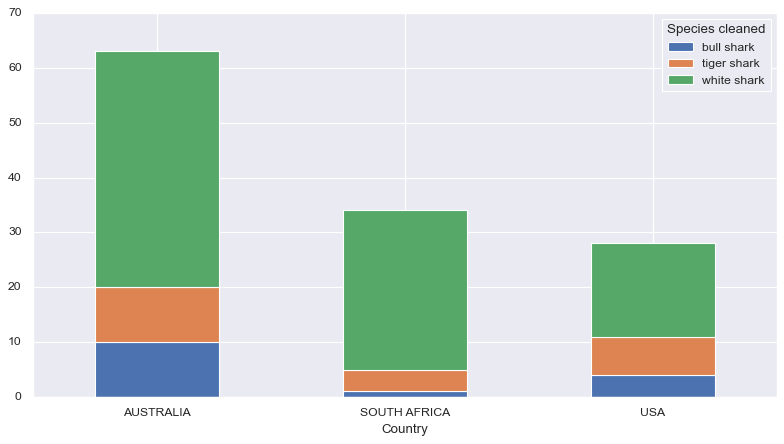

In [60]:
fatal_pivot_table.plot(kind='bar', stacked=True)
plt.xticks(rotation=360)

plt

The pivot table depicts the distribution of fatal and non-fatal shark attacks in the countries for the three species (Bull shark, Tiger shark, and White shark) (USA, Australia, South Africa). The plot displays the data in a visually appealing and simple manner, allowing us to compare the number of fatal and non-fatal attacks across different species and countries. We can also see the proportion of fatal and non-fatal attacks for each species in each country by stacking the bars. 

The study shows that the White Shark is the most lethal species, while the Bull Shark is the least aggressive of the three. The USA is the safest place to be in the sea among the three countries, while Australia is by far the most dangerous

5.0